# LIBRARIES IMPORT

In [1]:
# imports

import fig_lib 
import CNN_lib
import CNN_utilities
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import pickle

from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split


In [2]:
init_time = time.time()

In [3]:
data_load_dicom,generate_new_peakle=True,True
generate_new_data=False 

load_train_data=False
video_d=True                                    # Video = True , Image = False 

In [4]:

pkl_d_p = 'C:\PROJECTS\emboendo\CNN/input_d.pkl'
pkl_train_p='C:\PROJECTS\emboendo\CNN/train_d.pkl'        

# DATA LOAD

In [5]:
data_load_dicom=True

if data_load_dicom:

    patients_recs_d_df=CNN_utilities.main_d_df()
    patients_labels_d_df=CNN_utilities.labels_df()
    patients_d_df=pd.merge( patients_labels_d_df,patients_recs_d_df, on='PatientID')
    
    display(patients_d_df)


,PatientID,Sex,Age,S.E.,M.A.,A.C.V.,label,Records
0,62,0,67,0,0,0,0,"[I0, I1, I2, I9, I11, I18]"
1,76,1,72,0,0,0,0,"[I24, I25, I26, I27, I28, I33, I38, I39, I40, ..."
2,93,0,78,0,0,0,0,"[I50, I51, I53, I54, I56, I57, I58, I61, I63, ..."
3,103,0,82,1,0,0,1,"[I70, I71, I72, I73, I77, I79, I80, I81, I82, ..."
4,105,1,57,1,0,0,1,"[I86, I87, I89, I90, I91, I92, I93, I94, I95, ..."
...,...,...,...,...,...,...,...,...
60,1311,1,73,0,0,0,0,"[I1183, I1189, I1190, I1192, I1197, I1200, I1202]"
61,1327,1,55,0,0,0,0,"[I1203, I1205, I1206, I1207, I1209, I1215, I12..."
62,1340,1,73,0,0,0,0,"[I1221, I1224, I1226, I1227, I1228, I1232, I12..."
63,1358,1,62,1,0,0,1,"[I1242, I1243, I1244, I1247, I1248, I1252, I12..."


In [6]:

if data_load_dicom:
    
    if generate_new_peakle:
        
        input_d={}    

        for label,ii in zip(patients_d_df['label'],patients_d_df['Records']):
            
            for rec in ii:

                input_d[rec]={'label':label}
                ds_file=CNN_utilities.load_rec(rec)
                vd_ls=[]

                for i in range(ds_file.pixel_array.shape[0]):
                    
                    image_8bit,  width, height = CNN_utilities.im_data(ds_file.pixel_array[i])
                    vd_ls.append(image_8bit)

                input_d[rec]['image']=np.array(vd_ls)
                input_d[rec]['dimHW']= [height,width]   

        with open(pkl_d_p, 'wb') as pikle_file:
            pickle.dump(input_d, pikle_file)
        

    else: 

        with open(pkl_d_p, 'rb') as pikle_file:
            input_d = pickle.load(pikle_file)
       


In [7]:
if data_load_dicom:    
    
    print('FIRST LAYER KEYS:', list(input_d.keys()))
    print('SECOND LAYER KEYS:',list(input_d[list(input_d.keys())[0]].keys()))
    print(f' KEY TYPE "{list(input_d[list(input_d.keys())[0]].keys())[0]}":',type(input_d[list(input_d.keys())[0]][list(input_d[list(input_d.keys())[0]].keys())[0]]),'Example:',input_d[list(input_d.keys())[0]][list(input_d[list(input_d.keys())[0]].keys())[0]])
    print(f' KEY TYPE "{list(input_d[list(input_d.keys())[0]].keys())[1]}":',type(input_d[list(input_d.keys())[0]][list(input_d[list(input_d.keys())[1]].keys())[1]]),'Example shape:',np.shape(input_d[list(input_d.keys())[0]][list(input_d[list(input_d.keys())[1]].keys())[1]]))
    


FIRST LAYER KEYS: ['I0', 'I1', 'I2', 'I9', 'I11', 'I18', 'I24', 'I25', 'I26', 'I27', 'I28', 'I33', 'I38', 'I39', 'I40', 'I42', 'I44', 'I45', 'I47', 'I49', 'I50', 'I51', 'I53', 'I54', 'I56', 'I57', 'I58', 'I61', 'I63', 'I64', 'I65', 'I66', 'I67', 'I70', 'I71', 'I72', 'I73', 'I77', 'I79', 'I80', 'I81', 'I82', 'I85', 'I86', 'I87', 'I89', 'I90', 'I91', 'I92', 'I93', 'I94', 'I95', 'I101', 'I102', 'I103', 'I104', 'I107', 'I111', 'I112', 'I115', 'I116', 'I117', 'I119', 'I120', 'I121', 'I123', 'I124', 'I125', 'I126', 'I127', 'I131', 'I146', 'I147', 'I148', 'I154', 'I157', 'I159', 'I161', 'I163', 'I164', 'I165', 'I167', 'I168', 'I169', 'I172', 'I174', 'I176', 'I177', 'I178', 'I179', 'I180', 'I181', 'I182', 'I187', 'I189', 'I191', 'I200', 'I201', 'I202', 'I203', 'I204', 'I208', 'I209', 'I212', 'I213', 'I215', 'I216', 'I218', 'I230', 'I238', 'I240', 'I243', 'I252', 'I254', 'I255', 'I257', 'I259', 'I261', 'I262', 'I263', 'I264', 'I265', 'I266', 'I267', 'I268', 'I269', 'I270', 'I278', 'I279', 'I281

In [8]:
if data_load_dicom:
    print('RECORD - LABEL - SHAPE')

    for R in input_d.keys():
        print(R,input_d[R]['label'],np.shape(input_d[R]['image']),type(input_d[R]['image']))
    

RECORD - LABEL - SHAPE
I0 0 (39, 600, 800) <class 'numpy.ndarray'>
I1 0 (44, 600, 800) <class 'numpy.ndarray'>
I2 0 (44, 600, 800) <class 'numpy.ndarray'>
I9 0 (52, 600, 800) <class 'numpy.ndarray'>
I11 0 (53, 600, 800) <class 'numpy.ndarray'>
I18 0 (29, 600, 800) <class 'numpy.ndarray'>
I24 0 (23, 434, 636) <class 'numpy.ndarray'>
I25 0 (23, 434, 636) <class 'numpy.ndarray'>
I26 0 (21, 434, 636) <class 'numpy.ndarray'>
I27 0 (23, 434, 636) <class 'numpy.ndarray'>
I28 0 (23, 434, 636) <class 'numpy.ndarray'>
I33 0 (24, 434, 636) <class 'numpy.ndarray'>
I38 0 (24, 434, 636) <class 'numpy.ndarray'>
I39 0 (24, 434, 636) <class 'numpy.ndarray'>
I40 0 (20, 434, 636) <class 'numpy.ndarray'>
I42 0 (22, 434, 636) <class 'numpy.ndarray'>
I44 0 (23, 434, 636) <class 'numpy.ndarray'>
I45 0 (24, 434, 636) <class 'numpy.ndarray'>
I47 0 (23, 434, 636) <class 'numpy.ndarray'>
I49 0 (23, 434, 636) <class 'numpy.ndarray'>
I50 0 (39, 422, 636) <class 'numpy.ndarray'>
I51 0 (39, 422, 636) <class 'numpy.n

# DATA GENERATOR

In [9]:
# -------- DATA PARAMS --------               

if generate_new_data:    

    total_n_recs=400
    #n_recs_train,n_recs_eval=300,80
    HEIGHT, WIDTH = 100, 100
    circles_filled=False
    color=255

    # -------- Video ---------
 

    n_frames=[10,12]    # [min,max]

    t_btw_frm=0.2

In [10]:
#input_d, eval_d

if generate_new_data:

    if video_d:
        
        input_d=fig_lib.vid_data_gen(HEIGHT, WIDTH,total_n_recs,n_frames,'I',cir_f=circles_filled,color=color)
        
    else:

        input_d=fig_lib.im_data_gen(HEIGHT, WIDTH,total_n_recs,'I',cir_f=circles_filled,color=color)

    print('FIRST LAYER KEYS:', list(input_d.keys()))
    print('SECOND LAYER KEYS:',list(input_d[list(input_d.keys())[0]].keys()))
    print(f' KEY TYPE "{list(input_d[list(input_d.keys())[0]].keys())[0]}":',type(input_d[list(input_d.keys())[0]][list(input_d[list(input_d.keys())[0]].keys())[0]]),'Example:',input_d[list(input_d.keys())[0]][list(input_d[list(input_d.keys())[0]].keys())[0]])
    print(f' KEY TYPE "{list(input_d[list(input_d.keys())[0]].keys())[1]}":',type(input_d[list(input_d.keys())[0]][list(input_d[list(input_d.keys())[1]].keys())[1]]),'Example shape:',np.shape(input_d[list(input_d.keys())[0]][list(input_d[list(input_d.keys())[1]].keys())[1]]))


In [11]:
print('RECORD - LABEL - SHAPE')

if generate_new_data:
    
    for R in input_d.keys():
        print(R,input_d[R]['label'],np.shape(input_d[R]['image']),type(input_d[R]['image']))

RECORD - LABEL - SHAPE


# CHECK DATA

In [12]:
t_btw_frm=0.05
d_plt_check,rec_check=False,'I82'
print(input_d[rec_check]['label'])


1


In [13]:
# check video

if d_plt_check:

    if video_d:fig_lib.vid_show(input_d[rec_check]['image'],t_btw_frm=t_btw_frm)
    else:fig_lib.im_show(input_d[rec_check]['image'])



# CNN

### GENERATE TRAIN DATA

In [14]:
# X_train,Y_train

if load_train_data: 
      
    with open(pkl_train_p, 'rb') as pikle_file:

        save_trains= pickle.load(pikle_file)

    X_train,Y_train =  save_trains[0],save_trains[1]

else:

    if video_d:X_train,Y_train,max_frm_n,HEIGHT, WIDTH =CNN_lib.vid_d_bin_gen(input_d, zero=0, one= 1)
    else:X_train,Y_train =CNN_lib.im_d_bin_gen(input_d,zero='circle', one= 'line')

    save_trains=[X_train,Y_train]

    with open(pkl_train_p, 'wb') as pikle_file:
            
            pickle.dump(save_trains, pikle_file)



In [15]:
# X_train,Y_train,X_eval,Y_eval

test_size=0.2
X_train, X_eval, Y_train, Y_eval = train_test_split(X_train, Y_train, test_size=test_size) #,random_state=42)

print('Train data:',len(Y_train),'Evaluation data:',len(Y_eval))

Train data: 488 Evaluation data: 123


 Train data shape: (488, 94, 600, 800, 1)  Validation data shape: (123, 94, 600, 800, 1)


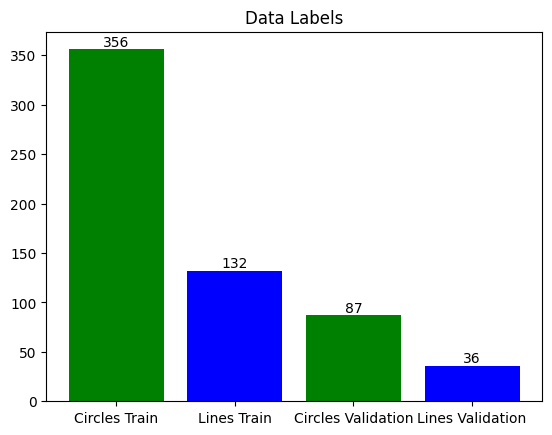

In [16]:
# check data

zeros_count = np.sum(Y_train == 0)
ones_count = np.sum(Y_train == 1)
zeros_count_val = np.sum(Y_eval == 0)
ones_count_val = np.sum(Y_eval == 1)

labels = ['Circles Train', 'Lines Train','Circles Validation', 'Lines Validation']
print(' Train data shape:', np.shape(X_train),' Validation data shape:', np.shape(X_eval))

plt.bar(labels, [zeros_count, ones_count,zeros_count_val,ones_count_val], color=['green', 'blue','green', 'blue'])

for i, count in enumerate([zeros_count, ones_count,zeros_count_val,ones_count_val]):

    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.title('Data Labels')
plt.show()

In [18]:
end_time = time.time()

process_time = end_time - init_time
print(f"Tiempo transcurrido: {process_time} segundos")

Tiempo transcurrido: 2152.994993686676 segundos


### PARAMETERS

In [19]:
print('LIBRARY MODELS:')
print(' ')

for model_name in CNN_lib.MODELS.values(): print(model_name)

LIBRARY MODELS:
 
image_full
image_conv
image_conv_augmentation
video_conv2D
video_conv3D


In [20]:
# -------- CNN PARAMS --------

# -------- MODEL --------

model_from_CNN_lib,mdl= False,'video_conv2D'

opt='adam'
lss='binary_crossentropy'

# -------- TRAINNING --------

epch=2


### MODEL

In [21]:
# MODEL 

if model_from_CNN_lib:
  
  if video_d: model = CNN_lib.lib_models(mdl,im_input_shp=(max_frm_n, HEIGHT, WIDTH, 1))
  else: model = CNN_lib.lib_models(mdl,im_input_shp=(HEIGHT, WIDTH,1))

else:

  model = models.Sequential([
          layers.Conv3D(filters=16, kernel_size=(3, 3, 3), activation='relu',input_shape=(max_frm_n, HEIGHT, WIDTH, 1)),
          layers.MaxPooling3D(pool_size=(2, 2, 2)),
          layers.Conv3D(filters=32, kernel_size=(1, 3, 3),  activation='relu'),
          layers.MaxPooling3D(pool_size=(2, 2, 2)),
          layers.Conv3D(filters=32, kernel_size=(1, 3, 3),  activation='relu'),
          layers.MaxPooling3D(pool_size=(2, 2, 2)),
          layers.Conv3D(filters=64, kernel_size=(1, 3, 3),  activation='relu'),
          layers.Flatten(),
          layers.Dense(64, activation='relu'),
          layers.Dense(1,activation='sigmoid')
          ])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 92, 598, 798, 16   448       
                             )                                   
                                                                 
 max_pooling3d (MaxPooling3  (None, 46, 299, 399, 16   0         
 D)                          )                                   
                                                                 
 conv3d_1 (Conv3D)           (None, 46, 297, 397, 32   4640      
                             )                                   
                                                                 
 max_pooling3d_1 (MaxPoolin  (None, 23, 148, 198, 32   0         
 g3D)                        )                                   
                                                                 
 conv3d_2 (Conv3D)           (None, 23, 146, 196, 32   9

In [22]:
model.compile(optimizer=opt, loss=lss, metrics=['accuracy'])

### TRAINNING

In [23]:
t_in=time.time()
history =model.fit(X_train, Y_train, epochs=epch, validation_data=(X_eval,Y_eval))
t_train=time.time()-t_in

MemoryError: Unable to allocate 20.5 GiB for an array with shape (488, 94, 600, 800, 1) and data type uint8

### EVALUATE MODEL

In [ ]:
fg_size=(14,8)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epch)

plt.figure(figsize=fg_size)
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')  
plt.ylabel('Accuracy')  

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')  
plt.ylabel('Loss')  
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(X_eval,Y_eval,verbose=2)

print(f'Loss: {test_loss}',f'Accuracy: {test_accuracy}')

In [ ]:
performance_d={'NAME':mdl,
               'ACCURACY':test_accuracy,
               'LOSS':test_loss,
               'VIDEO':video_d,
               'TRAIN SAMPLES':n_recs_train,
               'VALIDATION SAMPLES':n_recs_eval,
               'TRAINNING TIME':t_train,
               'EPOCHS':epch,
               'FRAMES RANGE':n_frames,
               'HEIGHT':HEIGHT,
               'WIDTH':WIDTH}

performance_d

### FORECAST

GENERATE RANDOM IMAGE

In [ ]:
# generate random im

n_rdm=np.random.rand()

if video_d:
    
    vd_ls=[]
    N_frames=np.random.randint(n_frames[0],n_frames[1]+1)

    if n_rdm>=0.5:

        p1=[np.random.randint(0, WIDTH-1),np.random.randint(0, HEIGHT-1)]
        p2=[np.random.randint(0, WIDTH-1),np.random.randint(0, HEIGHT-1)]

        for _ in range(N_frames):

            vd_ls.append(fig_lib.line_im(p1,p2,height=HEIGHT, width=WIDTH,thickness=(1,3),color=color))
            p1[0]+= np.random.randint(-int(WIDTH*0.02), int(WIDTH*0.02))
            p2[0]+=np.random.randint(-int(WIDTH*0.06), int(WIDTH*0.06))
            p1[1]+= np.random.randint(-int(HEIGHT*0.02), int(HEIGHT*0.02))
            p2[1]+=np.random.randint(-int(HEIGHT*0.06), int(HEIGHT*0.06))

        label='Line'
        

    else:

        center= [np.random.randint(int(0+WIDTH*0.3), int(WIDTH - WIDTH*0.3)),np.random.randint(int(0+HEIGHT*0.3), int(HEIGHT-HEIGHT*0.3))]
        radio = np.random.randint(12, 17)

        for _ in range(N_frames):
        
            vd_ls.append(fig_lib.circle_im(center,radio,height=HEIGHT, width=WIDTH,thickness=(1,3),color=color,filled=circles_filled))
            center[0]+= np.random.randint(-int(WIDTH*0.03), int(WIDTH*0.03))
            center[1]+= np.random.randint(-int(HEIGHT*0.03), int(HEIGHT*0.03))
            radio += np.random.randint(-int(HEIGHT*0.01), int(HEIGHT*0.02))

        label ='circle'

    video=np.array(vd_ls)
    image = video[:, :, :, np.newaxis]
    frames_actual = image.shape[0]
    if frames_actual < max_frm_n:
        
        padding = np.zeros((max_frm_n - frames_actual, HEIGHT, WIDTH, 1))
        image = np.concatenate([image, padding], axis=0)

else:

    if n_rdm>=0.5:

        p1=[np.random.randint(0, WIDTH-1),np.random.randint(0, HEIGHT-1)]
        p2=[np.random.randint(0, WIDTH-1),np.random.randint(0, HEIGHT-1)]
        image=fig_lib.line_im(p1,p2,height=HEIGHT, width=WIDTH,thickness=(1,3),color=color)
        label='Line'

    else:
        
        center= [np.random.randint(int(0+WIDTH*0.3), int(WIDTH - WIDTH*0.3)),np.random.randint(int(0+HEIGHT*0.3), int(HEIGHT-HEIGHT*0.3))]
        radio = np.random.randint(12, 17)
        image=fig_lib.circle_im(center,radio,height=HEIGHT, width=WIDTH,thickness=(1,3),color=color,filled=circles_filled)
        label= 'circle'

In [ ]:
# Forecast

pred = model.predict(np.expand_dims(image, axis=0),verbose=2)
CNN_lib.bin_forecast(pred,label=label,up_frc='line',down_frc='circle')


In [ ]:
# show

if video_d:fig_lib.vid_show(video)
else:fig_lib.im_show(image)